# Data Analyst Professional Practical Exam Submission


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('product_sales.csv')

print(df.head())
df.info()

   week  sales_method  ... nb_site_visits      state
0     2         Email  ...             24    Arizona
1     6  Email + Call  ...             28     Kansas
2     5          Call  ...             26  Wisconsin
3     4         Email  ...             25    Indiana
4     3         Email  ...             28   Illinois

[5 rows x 8 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [18]:
df['sales_method'] = df['sales_method'].str.replace('email', 'Email').replace("em + call", "Email and Call").replace('Email + Call', 'Email and Call')

df['sales_method'] = df['sales_method'].astype('category')

df['sales_method'].unique()
df['sales_method'].dtype

CategoricalDtype(categories=['Call', 'Email', 'Email and Call'], ordered=False)

In [19]:
df['customer_id'] = df.customer_id.astype('string')
df['customer_id'].dtype

string[python]

In [20]:
df['state'] = df.state.astype('string')
df['state'].dtype

string[python]

In [21]:
print(df['state'].head(20))
df['state'].unique()

0           Arizona
1            Kansas
2         Wisconsin
3           Indiana
4          Illinois
5       Mississippi
6           Georgia
7          Oklahoma
8     Massachusetts
9          Missouri
10            Texas
11         New York
12         Maryland
13       California
14        Tennessee
15         Missouri
16     Pennsylvania
17        Wisconsin
18     North Dakota
19          Florida
Name: state, dtype: string


<StringArray>
[       'Arizona',         'Kansas',      'Wisconsin',        'Indiana',
       'Illinois',    'Mississippi',        'Georgia',       'Oklahoma',
  'Massachusetts',       'Missouri',          'Texas',       'New York',
       'Maryland',     'California',      'Tennessee',   'Pennsylvania',
   'North Dakota',        'Florida',       'Michigan', 'North Carolina',
         'Hawaii',       'Colorado',      'Louisiana',       'Virginia',
     'New Mexico',       'Arkansas',         'Alaska',         'Oregon',
  'New Hampshire',           'Ohio',     'New Jersey',    'Connecticut',
           'Iowa',        'Montana',     'Washington',       'Kentucky',
        'Alabama',       'Nebraska', 'South Carolina',      'Minnesota',
   'South Dakota',       'Delaware',          'Maine',           'Utah',
  'West Virginia',        'Vermont',   'Rhode Island',         'Nevada',
          'Idaho',        'Wyoming']
Length: 50, dtype: string

In [22]:
df['revenue'].isnull().sum()

1074

In [36]:
df['revenue'] = df['revenue'].fillna(np.median(df['revenue']))
df['revenue'].shape

(15000,)

In [39]:
df['revenue'].shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   week               15000 non-null  int64   
 1   sales_method       15000 non-null  category
 2   customer_id        15000 non-null  string  
 3   nb_sold            15000 non-null  int64   
 4   revenue            13926 non-null  float64 
 5   years_as_customer  15000 non-null  int64   
 6   nb_site_visits     15000 non-null  int64   
 7   state              15000 non-null  string  
dtypes: category(1), float64(1), int64(4), string(2)
memory usage: 835.2 KB


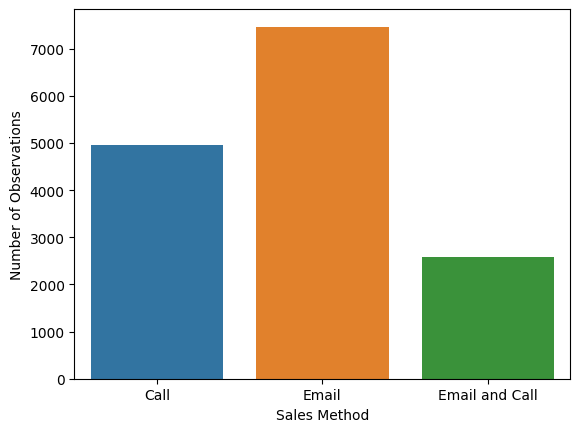

In [25]:
sns.countplot(x='sales_method', data=df)

plt.xlabel('Sales Method')
plt.ylabel('Number of Observations')
plt.show()

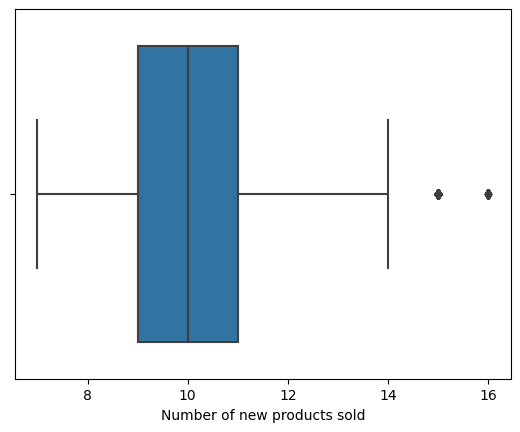

In [26]:
sns.boxplot(x='nb_sold', data=df)

plt.xlabel("Number of new products sold")

plt.show()

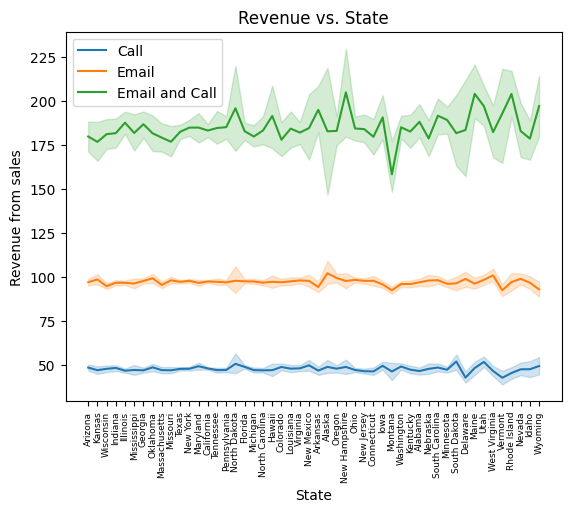

In [27]:
sns.lineplot(x='state', y='revenue', hue='sales_method', data=df)

plt.xticks(rotation=90, size=6.5)
plt.legend()
plt.ylabel('Revenue from sales')
plt.xlabel('State')
plt.title("Revenue vs. State")

plt.show()

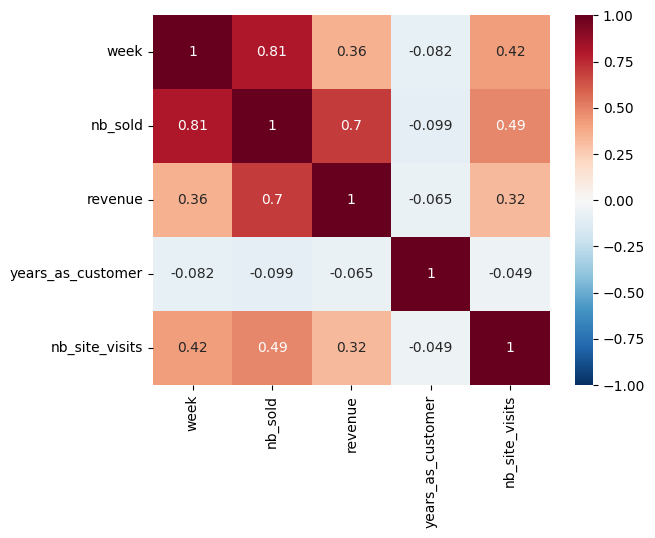

In [28]:
df.corr()


sns.heatmap(df.corr(), cmap='RdBu_r', annot=True, vmin=-1, vmax=1)

plt.show()

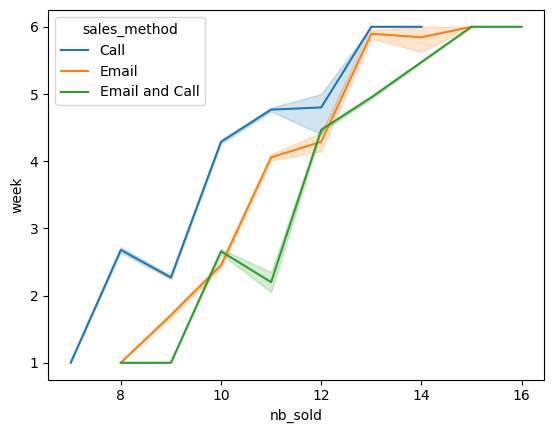

In [29]:
sns.lineplot(x='nb_sold', y='week', hue='sales_method', data=df)

plt.show()

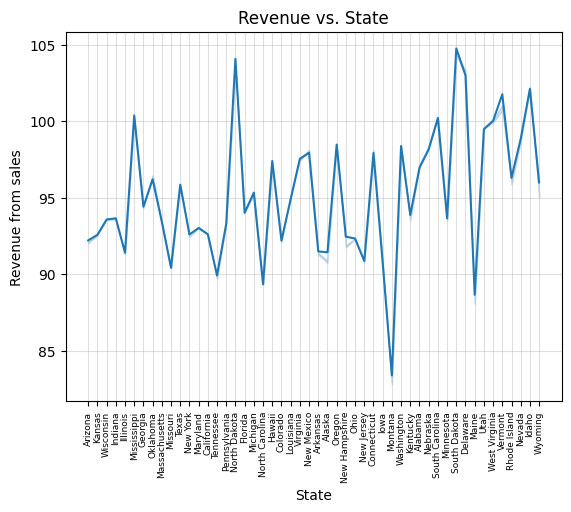

In [30]:
sns.lineplot(x='state', y='revenue', data=df, ci=True)

plt.xticks(rotation=90, size=6.5)
plt.ylabel('Revenue from sales')
plt.xlabel('State')
plt.grid(alpha=0.4)
plt.title("Revenue vs. State")

plt.show()

As the business landscape becomes increasingly competitive, it's more important than ever to have a clear understanding of your product sales performance. By analyzing your sales data, you can identify trends, opportunities, and areas for improvement, which can help you make better-informed decisions about your business strategy. This report aims to provide a detailed analysis of our product sales over the past year, with a focus on identifying key trends, customer preferences, and potential growth opportunities. By examining our sales data, we hope to gain a deeper understanding of our customers' needs and preferences, and develop strategies that will enable us to continue to grow and succeed in the market.
   
   
![sales_method_plot1](sales_method_plot1.png)

A countplot is a type of data visualization that displays the number of observations in each category of a categorical variable. In the context of analyzing product sales, a countplot can be a useful tool for identifying patterns and trends in the sales data.

In this particular countplot, we can see that the most common sales method is by email. This suggests that our customers are more likely to respond to email marketing campaigns or outreach. It may also indicate that email is a more convenient or efficient way for our sales team to reach out to potential customers.

On the other hand, we can see that the most uncommon sales method is the Email + Call. This may indicate that our sales team is not as successful at converting customers through phone calls, or that our customers prefer not to be contacted via phone.

These insights can be used to inform our sales strategy going forward. For example, we may want to allocate more resources towards email marketing campaigns and optimize our email outreach. We may also want to train our sales team on more effective phone communication techniques or explore other sales methods that are more effective with our customer base.

In order to obtain these results, I have cleaned the 'sales_method' column for typos. This process can help to ensure that the data is accurate and reliable, and can lead to more meaningful insights.

Overall, this countplot provides a quick and easy-to-interpret visual representation of the sales data, allowing us to identify patterns and trends that may be difficult to discern from raw data alone.

![Number_of_new_products_sold](Number_of_new_products_sold.png)

A boxplot is a type of plot that displays the distribution of a continuous variable through its quartiles. The box in the plot contains the middle 50% of the data, and the whiskers extend to the minimum and maximum values. Outliers are typically plotted as individual points.

In this case, the boxplot was generated to visualize the distribution of the number of new products sold to a single customer. The boxplot revealed that the most common number of new products sold to a single customer is 10, which is the median value. This means that 50% of customers purchased 10 or fewer new products, while the other 50% purchased 10 or more.

The boxplot also showed that the average number of new products sold is around 9 to 11, as indicated by the placement of the box on the plot. Additionally, there were some instances where some customers bought 15 or even 16 new products, as indicated by the outliers in the plot.

Overall, by analyzing the data using a boxplot, we were able to gain insights into the distribution of the number of new products sold to a single customer, including the median value, the average range, and the presence of outliers. This information could be useful for developing sales strategies and identifying potential opportunities for growth.


![Revenue_vs_state_simple](Revenue_vs_state_simple.png)


The lineplot shows the variation in revenue for each state. The lowest revenue is seen in Montana, while South Dakota has the highest revenue. However, it is important to note that 1074 missing values were present in the revenue column and had to be replaced with the median value of the column. The median revenue for all the states is between 80 and 105 dollars, and a confidence interval has been set to represent it. This is because there may be other factors that need to be considered when analyzing revenue and state data.

![Revenue_vs_state](Revenue_vs_state.png)

To gain a deeper understanding of the revenue generated by each state, a second line plot has been created that incorporates another variable, sales method. This plot shows that Email + Call method is the most productive sales method in all states, while the calling method generates the least revenue. This plot emphasizes the importance of considering multiple factors when analyzing revenue data.

The Email + Call method was likely more productive than the calling method for a few reasons.

Firstly, the Email + Call method combines two different communication channels, which allows for a wider range of customer reach and potentially more successful sales. Using email allows for the sales team to provide customers with detailed information about the products being sold, which can help to answer any questions or concerns the customer may have. This can be followed up with a phone call to provide personalized assistance and further convince the customer to make a purchase.

In contrast, using only the calling method limits the range of communication and may be less effective in reaching a larger audience. It can also be more challenging to hold a customer's attention during a phone call, and it may be more difficult to provide detailed information about the products being sold without visual aids.

Another reason why the Email + Call method may be more effective is that it allows for a more personalized approach to selling. By using both email and phone communication, the sales team can tailor their approach to the individual customer and address any concerns they may have, which can lead to more successful sales.

Overall, the combination of email and call communication allows for a more versatile and personalized approach to selling, which is likely why it was more productive than the calling method alone. 

Analyzing all the plots it seems that they suggest using email in combination with other sales methods, such as phone calls, can be more effective than using phone calls alone, and that email marketing campaigns or outreach may be a more convenient or efficient way to reach potential customers.

To monitor the business problem of product sales performance, the business should use the countplot and lineplot metrics to identify patterns and trends in sales data, understand customer preferences and behaviors, and inform sales strategy going forward. The countplot can be used to identify the most effective sales method, such as email, and potentially allocate more resources towards email marketing campaigns. The boxplot can be used to gain insights into the distribution of the number of new products sold to a single customer and identify potential opportunities for growth. Finally, the lineplot can be used to compare revenue generated by each state and sales method, highlighting the importance of considering multiple factors when analyzing revenue data. By monitoring these metrics, the business can gain a deeper understanding of its product sales performance and make informed decisions about its business strategy.

Based on the findings, it is recommended that the business allocate more resources towards email marketing campaigns and optimize email outreach since email is the most common and likely successful sales method for the business. The sales team can also be trained on more effective phone communication techniques or explore other sales methods that are more effective with the customer base. Additionally, the median revenue for all the states is between 80 and 105 dollars, and it is important to consider other factors when analyzing revenue and state data. The Email + Call method is the most productive sales method in all states, and it is recommended that the business continue to utilize this approach to take advantage of the personalized and versatile approach it offers.

It is also recommended that the business consider other factors that can affect sales performance, such as customer preferences and potential growth opportunities. By continuously analyzing sales data and incorporating various variables, the business can make better-informed decisions about its strategy and identify opportunities for growth in an increasingly competitive business landscape.




